## Importing Library and Dataset

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = pd.read_csv('OPTION1_uk_road_accident_2019_coursework_final.csv')
data.head(5)

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,2019010225080,30,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.0,serious
1,2019200908684,30,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,fatal
2,2019040860897,40,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,data missing or out of range,NaN,serious
3,2019460847205,40,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,NaN,serious
4,2019051911581,30,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.0,slight


## Observing Data Types

In [16]:
data.dtypes

accident_index                  object
speed_limit                      int64
light_conditions                object
weather_conditions              object
road_surface_conditions         object
vehicle_type                    object
junction_location               object
skidding_and_overturning        object
vehicle_leaving_carriageway     object
hit_object_off_carriageway      object
first_point_of_impact           object
sex_of_driver                   object
age_of_oldest_driver           float64
accident_severity               object
dtype: object

##  Converting Categorical variables to Numerical


In [17]:
le = LabelEncoder()
data['vehicle_type'] = le.fit_transform(data['vehicle_type'])
data['light_conditions'] = le.fit_transform(data['light_conditions'])
data['weather_conditions'] = le.fit_transform(data['weather_conditions'])
data['road_surface_conditions'] = le.fit_transform(data['road_surface_conditions'])
data['junction_location'] = le.fit_transform(data['junction_location'])
data['skidding_and_overturning'] = le.fit_transform(data['skidding_and_overturning'])
data['vehicle_leaving_carriageway'] = le.fit_transform(data['vehicle_leaving_carriageway'])
data['hit_object_off_carriageway'] = le.fit_transform(data['hit_object_off_carriageway'])
data['first_point_of_impact'] = le.fit_transform(data['first_point_of_impact'])
data['sex_of_driver'] = le.fit_transform(data['sex_of_driver'])
data['accident_index'] = le.fit_transform(data['accident_index'])
data['accident_severity'] = le.fit_transform(data['accident_severity'])
data.head(5)

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,5821,30,0,3,4,1,0,2,2,2,3,1,63.0,4
1,13489,30,0,1,1,4,0,2,0,0,0,1,82.0,3
2,6742,40,1,1,1,4,0,2,2,2,0,2,NaN,4
3,22587,40,1,1,1,4,2,2,2,2,0,3,NaN,4
4,7339,30,1,1,1,4,2,2,2,2,0,0,39.0,5


## Removing NaN values and Filling them with '0'

In [18]:
data = data.dropna()
data = data.fillna(value=0)
data.head(5)

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,5821,30,0,3,4,1,0,2,2,2,3,1,63.0,4
1,13489,30,0,1,1,4,0,2,0,0,0,1,82.0,3
4,7339,30,1,1,1,4,2,2,2,2,0,0,39.0,5
6,19536,30,0,1,4,4,2,2,2,2,0,1,40.0,3
7,557,50,1,1,1,4,0,2,2,2,0,1,57.0,5


## Data PreProcessing

In [21]:
X = data.drop(columns=['accident_severity', 'accident_index'], axis=1)
y = data['accident_severity']

## Fitting X_train, y_train, X_test, y_test 

In [22]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Performing Decision Tree, Random Forest, SVM and KNN for Classification and measuring Accuracy

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(name)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))


Decision Tree
Accuracy: 0.6458333333333334
Confusion Matrix:
 [[   0    0    0    0    0    0    0]
 [   0    0    0    3    2    0    0]
 [   0    0    0    0    1    2    0]
 [   2    0    0  626  232  143   32]
 [   0    4    1  219 1316  298   49]
 [   0    0    5  170  389 1313   49]
 [   0    0    0   46   64   74    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         3
           3       0.59      0.60      0.60      1035
           4       0.66      0.70      0.68      1887
           5       0.72      0.68      0.70      1926
           6       0.00      0.00      0.00       184

    accuracy                           0.65      5040
   macro avg       0.28      0.28      0.28      5040
weighted avg       0.64      0.65      0.64      5040



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Accuracy: 0.6865079365079365
Confusion Matrix:
 [[   0    0    2    3    0    0]
 [   0    0    0    1    2    0]
 [   0    0  705  190  107   33]
 [   3    0  217 1352  266   49]
 [   0    2  163  305 1402   54]
 [   0    0   45   63   75    1]]
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         3
           3       0.62      0.68      0.65      1035
           4       0.71      0.72      0.71      1887
           5       0.76      0.73      0.74      1926
           6       0.01      0.01      0.01       184

    accuracy                           0.69      5040
   macro avg       0.35      0.36      0.35      5040
weighted avg       0.68      0.69      0.68      5040

SVM
Accuracy: 0.6174603174603175
Confusion Matrix:
 [[   0    0    0    4    1    0]
 [   0    0    0    1    2    0]
 [   0    0  500  176  359    0]
 [   0    0  184 1273

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN
Accuracy: 0.6402777777777777
Confusion Matrix:
 [[   0    0    2    3    0    0]
 [   0    0    0    1    2    0]
 [   0    0  592  220  222    1]
 [   0    0  228 1344  313    2]
 [   0    0  195  437 1291    3]
 [   0    0   43   70   71    0]]
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         3
           3       0.56      0.57      0.57      1035
           4       0.65      0.71      0.68      1887
           5       0.68      0.67      0.68      1926
           6       0.00      0.00      0.00       184

    accuracy                           0.64      5040
   macro avg       0.31      0.33      0.32      5040
weighted avg       0.62      0.64      0.63      5040



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Neural Network

### Neural Network Accuracy Calculator

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X.columns)]),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)
classes_x = np.argmax(y_pred, axis=1)

print('Neural Network')
print('Accuracy:', accuracy_score(y_test, classes_x))
print('Confusion Matrix:\n', confusion_matrix(y_test, classes_x))
print('Classification Report:\n', classification_report(y_test, classes_x))


Epoch 1/100
630/630 [==============================] - 17s 25ms/step - loss: nan - accuracy: 3.9688e-04 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/100
630/630 [==============================] - 2s 3ms/step - loss: nan - accuracy: 3.9688e-04 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/100
630/630 [==============================] - 2s 3ms/step - loss: nan - accuracy: 3.9688e-04 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/100
630/630 [==============================] - 3s 4ms/step - loss: nan - accuracy: 3.9688e-04 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/100
630/630 [==============================] - 2s 4ms/step - loss: nan - accuracy: 3.9688e-04 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/100
630/630 [==============================] - 2s 3ms/step - loss: nan - accuracy: 3.9688e-04 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/100
630/630 [==============================] - 2s 4ms/step - loss: nan - accuracy: 3.9688e-04 - val_loss: nan - val_accu

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

## Creating a bar plot of the accident severity counts

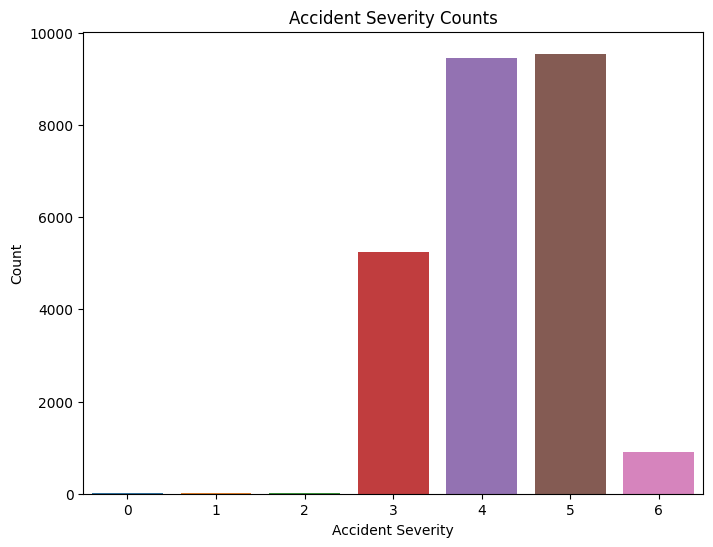

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

severity_counts = data['accident_severity'].value_counts()


plt.figure(figsize=(8, 6))
sns.barplot(x=severity_counts.index, y=severity_counts.values)
plt.title("Accident Severity Counts")
plt.xlabel("Accident Severity")
plt.ylabel("Count")
plt.show()



## Creating a heatmap of the correlation matrix


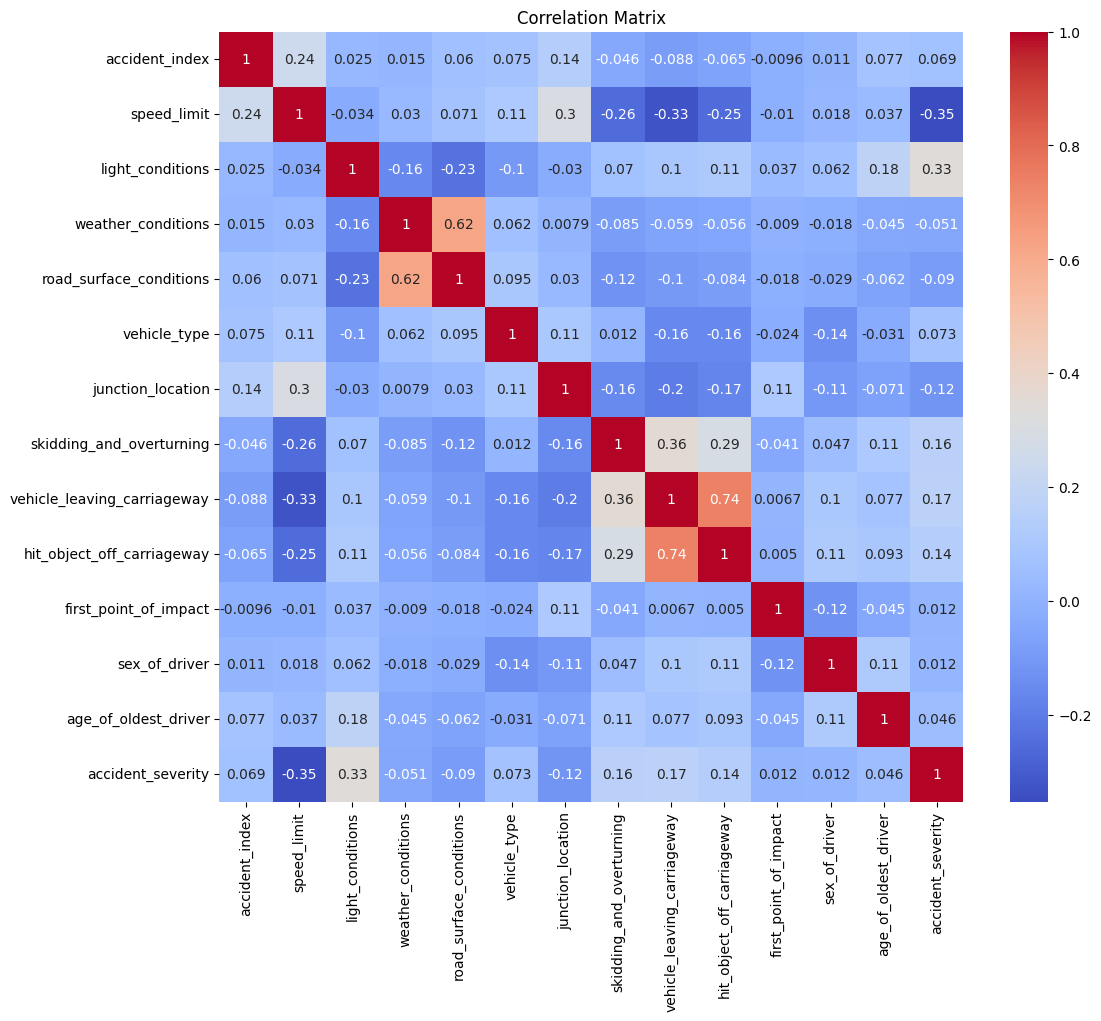

In [70]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Creating a scatter plot of speed limit vs. accident severity


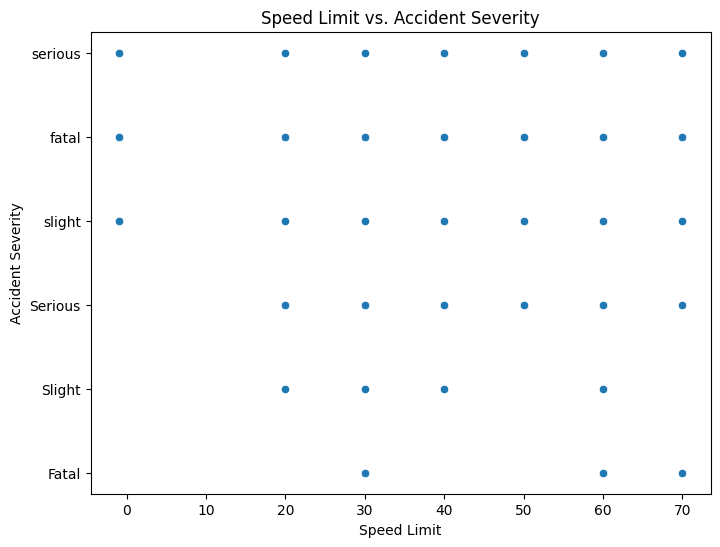

In [71]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='speed_limit', y='accident_severity', data=df)
plt.title("Speed Limit vs. Accident Severity")
plt.xlabel("Speed Limit")
plt.ylabel("Accident Severity")
plt.show()


## Create a box plot of age of oldest driver by accident severity


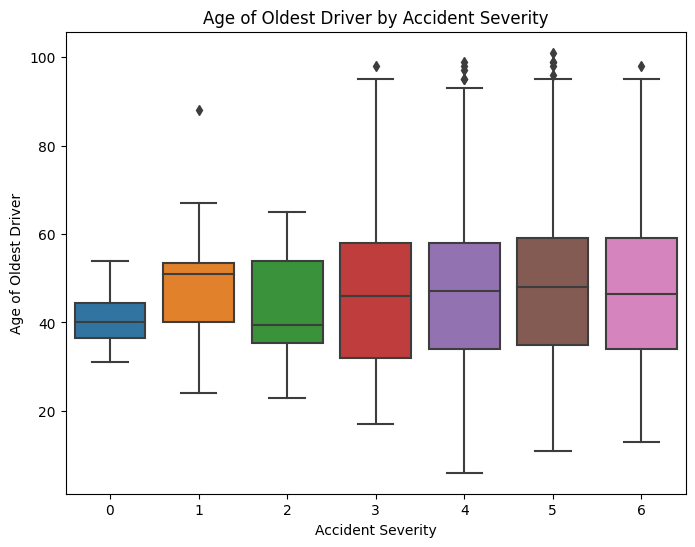

In [72]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='accident_severity', y='age_of_oldest_driver', data=data)
plt.title("Age of Oldest Driver by Accident Severity")
plt.xlabel("Accident Severity")
plt.ylabel("Age of Oldest Driver")
plt.show()

##  Creating a pairplot of selected variables

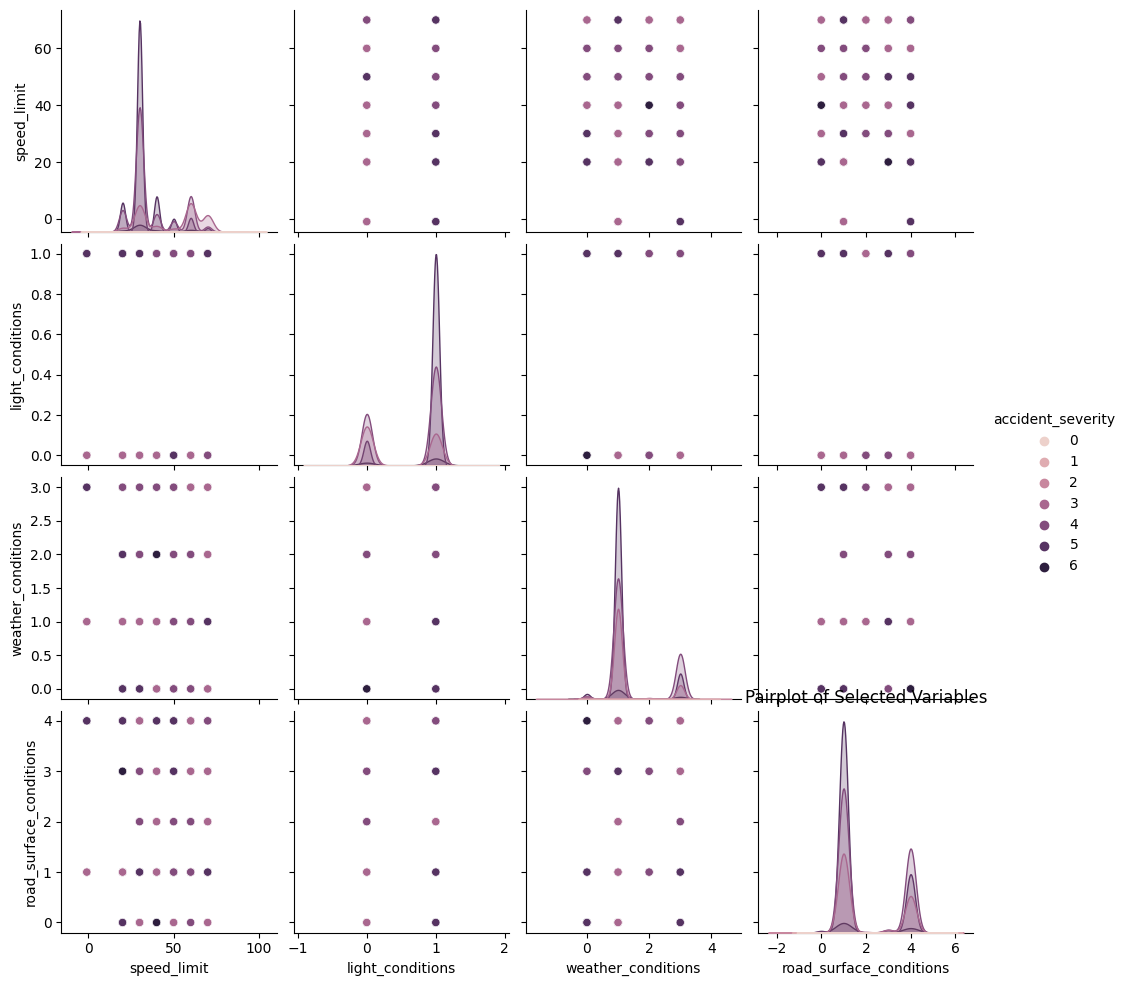

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


selected_vars = ['speed_limit', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'accident_severity']
sns.pairplot(data[selected_vars], hue='accident_severity')
plt.title("Pairplot of Selected Variables")
plt.show()

## Creating a count plot of accident severity by sex of driver


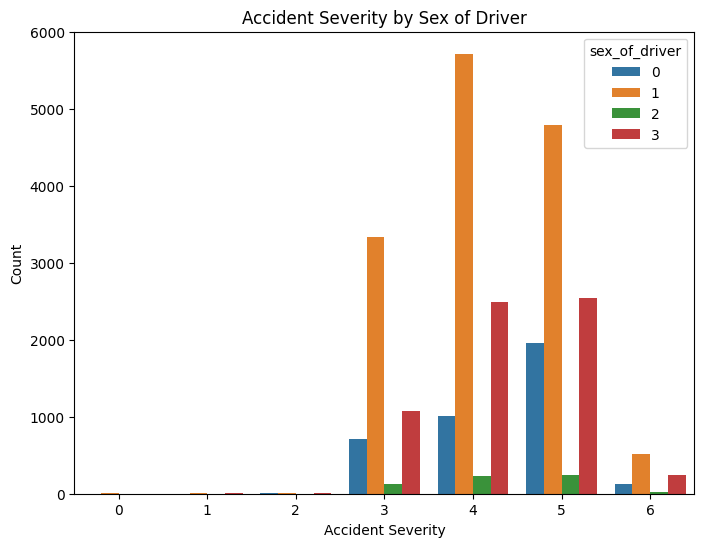

In [75]:
plt.figure(figsize=(8, 6))
sns.countplot(x='accident_severity', hue='sex_of_driver', data=data)
plt.title("Accident Severity by Sex of Driver")
plt.xlabel("Accident Severity")
plt.ylabel("Count")
plt.show()

## Creating a histogram of age of oldest driver

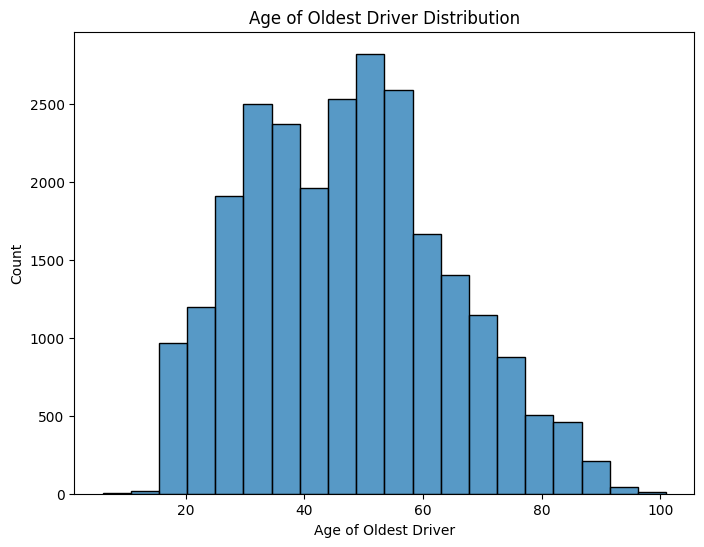

In [77]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x="age_of_oldest_driver", bins=20)
plt.title("Age of Oldest Driver Distribution")
plt.xlabel("Age of Oldest Driver")
plt.ylabel("Count")
plt.show()

In [30]:
!pip install nbconvert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
!jupyter nbconvert --to html uk_road_accidents_2019.ipynb

[NbConvertApp] Converting notebook uk_road_accidents_2019.ipynb to html
[NbConvertApp] Writing 1243831 bytes to uk_road_accidents_2019.html
